<a href="https://colab.research.google.com/github/Xavian-Yunos/DSL_T01/blob/main/T01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install git+https://github.com/pe8sutd/eda4u &> /dev/null
!git clone https://github.com/pe8sutd/eda4u &> /dev/null
%load_ext plugin

#Objectives:

Design and implement basic logic gates (NOT, AND, OR, XOR, NAND, NOR, XNOR) on the Basys 3 FPGA board using Verilog. Use switches sw[0] and sw[1] as inputs and LEDs led[7:0] to display the output of each gate. Demonstrate the input-output relationship using a truth table.

# Features:


1. **Inputs**:  
   - `sw[0]` (Input A)  
   - `sw[1]` (Input B)  
2. **Outputs**:  
   - Use `led[0]` to `led[7]` to represent the output of each logic gate (see table below).  
3. **Truth Table**:

| sw[1] (B) | sw[0] (A) | NOT A (led[0]) | BUF B (led[1]) | AND (led[2]) | OR (led[3]) | NOR (led[4]) | NAND (led[5]) | XOR (led[6]) | XNOR (led[7]) |
|:---------:|:---------:|:--------------:|:--------------:|:-----------:|:----------:|:-----------:|:------------:|:-----------:|:------------:|
| 0         | 0         | 1              | 0              | 0           | 0          | 1           | 1            | 0           | 1            |
| 0         | 1         | 0              | 0              | 0           | 1          | 0           | 1            | 1           | 0            |
| 1         | 0         | 1              | 1              | 0           | 1          | 0           | 1            | 1           | 0            |
| 1         | 1         | 0              | 1              | 1           | 1          | 0           | 0            | 0           | 1            |

# Design steps:
1. Create a new Vivado Project
— Use Basys3 Board
2. Create Constraint file
— Select Switches, LEDs, etc to be used
3. Create Design Source
— Input Verilog code
4. Create Simulation file
— Input Testbench Code, set simulation file as top
5. Run Simulation
6. Program device

# Verilog Code:

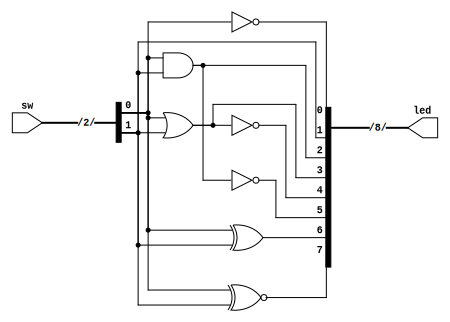

In [ ]:
%%print_verilog
module top_module(
output [7:0]led,
input [1:0]sw);
assign led[0] = ~sw[0]; // NOT A
assign led[1] = ~(~sw[1]); // BUFF B
assign led[2] = sw[0] & sw[1]; // AND
assign led[3] = sw[0] | sw[1]; // OR
assign led[4] = ~(sw[0] | sw[1]); //NOR
assign led[5] = ~(sw[0] & sw[1]); //NAND
assign led[6] = sw[0] ^ sw[1]; //XOR
assign led[7] = sw[0] ~^ sw[1]; //XNOR
endmodule

In [ ]:
%%verilog
module top_module(
output [7:0]led,
input [1:0]sw);
assign led[0] = ~sw[0]; // NOT A
assign led[1] = ~(~sw[1]); // BUFF B
assign led[2] = sw[0] & sw[1]; // AND
assign led[3] = sw[0] | sw[1]; // OR
assign led[4] = ~(sw[0] | sw[1]); //NOR
assign led[5] = ~(sw[0] & sw[1]); //NAND
assign led[6] = sw[0] ^ sw[1]; //XOR
assign led[7] = sw[0] ~^ sw[1]; //XNOR
endmodule


//---- Test Bench -----
module tb1;
wire [7:0]led;
reg [1:0]sw;

top_module uut(led, sw);
initial begin
$dumpfile("tb1.vcd");
$dumpvars;
    sw = 2'b00;
    #10 sw = 2'b01;
    #10 sw = 2'b10;
    #10 sw = 2'b11;
    #10 $finish;
$dumpoff;
end
endmodule

VCD info: dumpfile tb1.vcd opened for output.



# Simulation

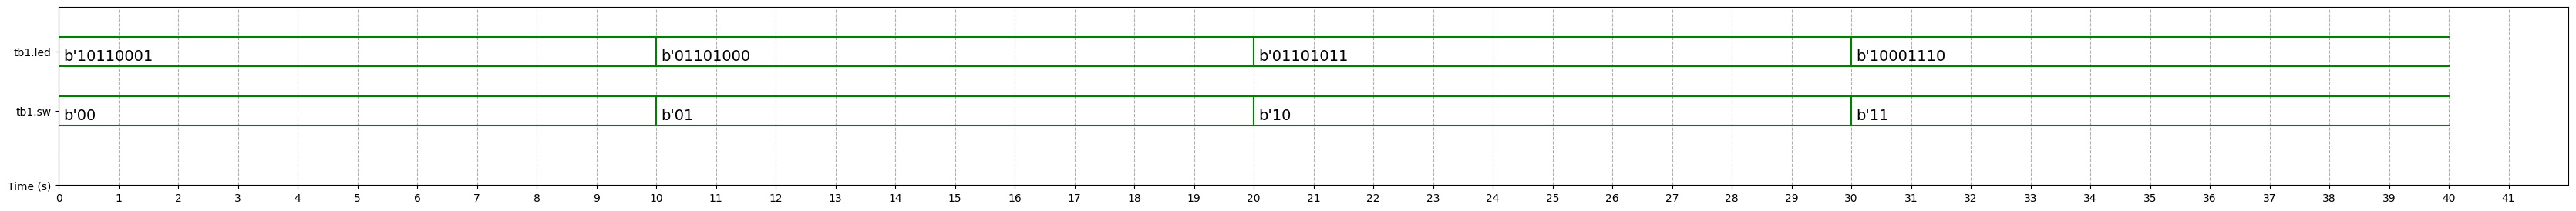

In [ ]:
%%waveform tb1.vcd
sign_list = ['tb1.led','tb1.sw']
time_begin = 0
time_end = 41
base = 'bin'

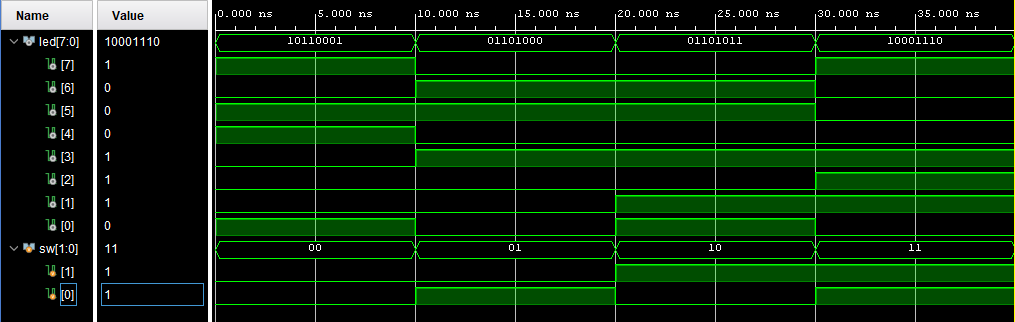

# Challenges:
1. Downloading Vivado (large programme size + updating parts and boards when making first project)
2. Hindrance of installation by anti-virus softwares such as AVG
2. Setting the correct switches and LEDs in the constraint file
3. Ensuring that the Verilog code works by testing on google colab, which refused to work sometimes, even when the code was correct and working earlier
4. Setting the right file as top (empty files made the programme confused)
5. Lack of USB to micro-b cables
6. Use the constraint file from the Github at Basys-3-Master.xdc
7. Understanding the difference between coding Verilog in Colab and Vivado, as functions such as %%verilog and $dumpfile are not used in Vivado

# Lessons learned:
1. Check email more often
2. Deactivate security software to allow program to run properly
3. Make sure that there are no ambiguous inputs (in constraint file, in simulation files)
4. Set enough time to be able to see the outputs on the simulations
